# Exploratory analysis
A brief exploratory analysis example. 

### Iris datasets
The exploratory analysis is done using iris dataset.

In [26]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")

## Part 1

In [27]:
loadlibrary("MASS")
data(iris)

In [28]:
head(iris[c(1:3,51:53,101:103),])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor


### Data Summary
A preliminary analysis using the $Sepal.Length$ attribute. 

This should be done for all attributes. 

In [29]:
sum <- summary(iris$Sepal.Length)
sum

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

In [30]:
IQR <- sum["3rd Qu."]-sum["1st Qu."]
print(sprintf("IQR=%.1f", IQR))

[1] "IQR=1.3"


## Part 2

### Histogram analysis

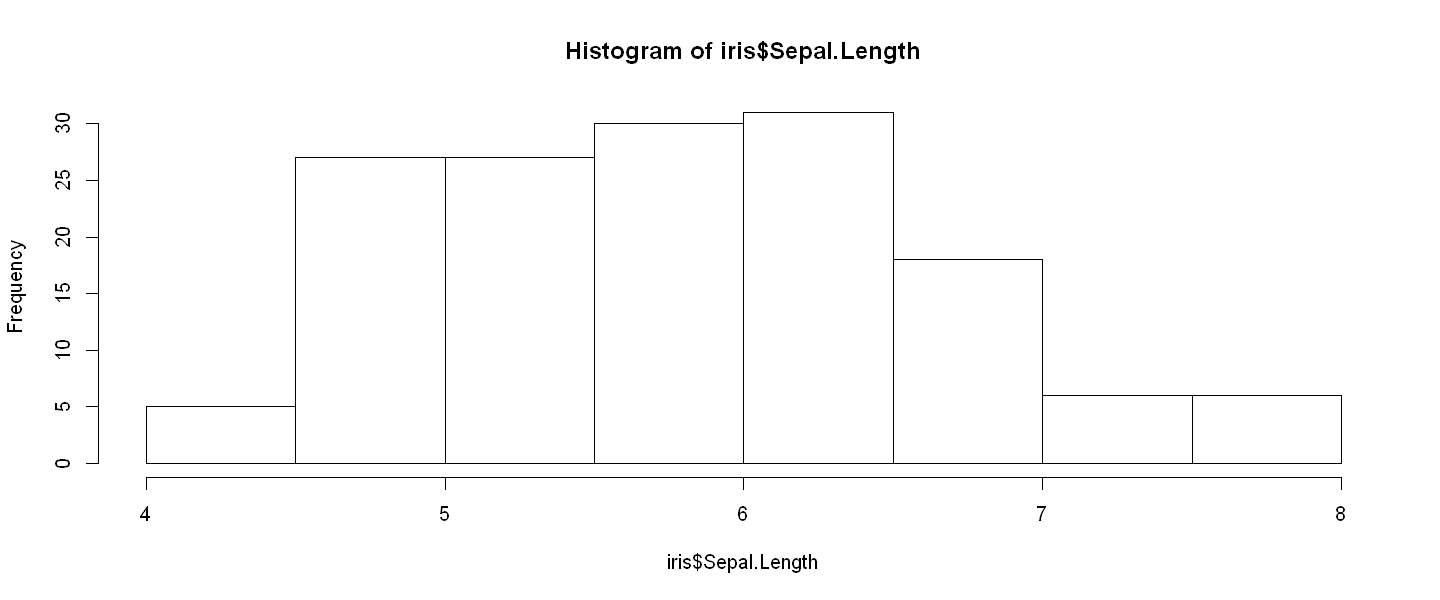

In [31]:
plot_size(12, 5)
hist(iris$Sepal.Length)

Grouping graphics

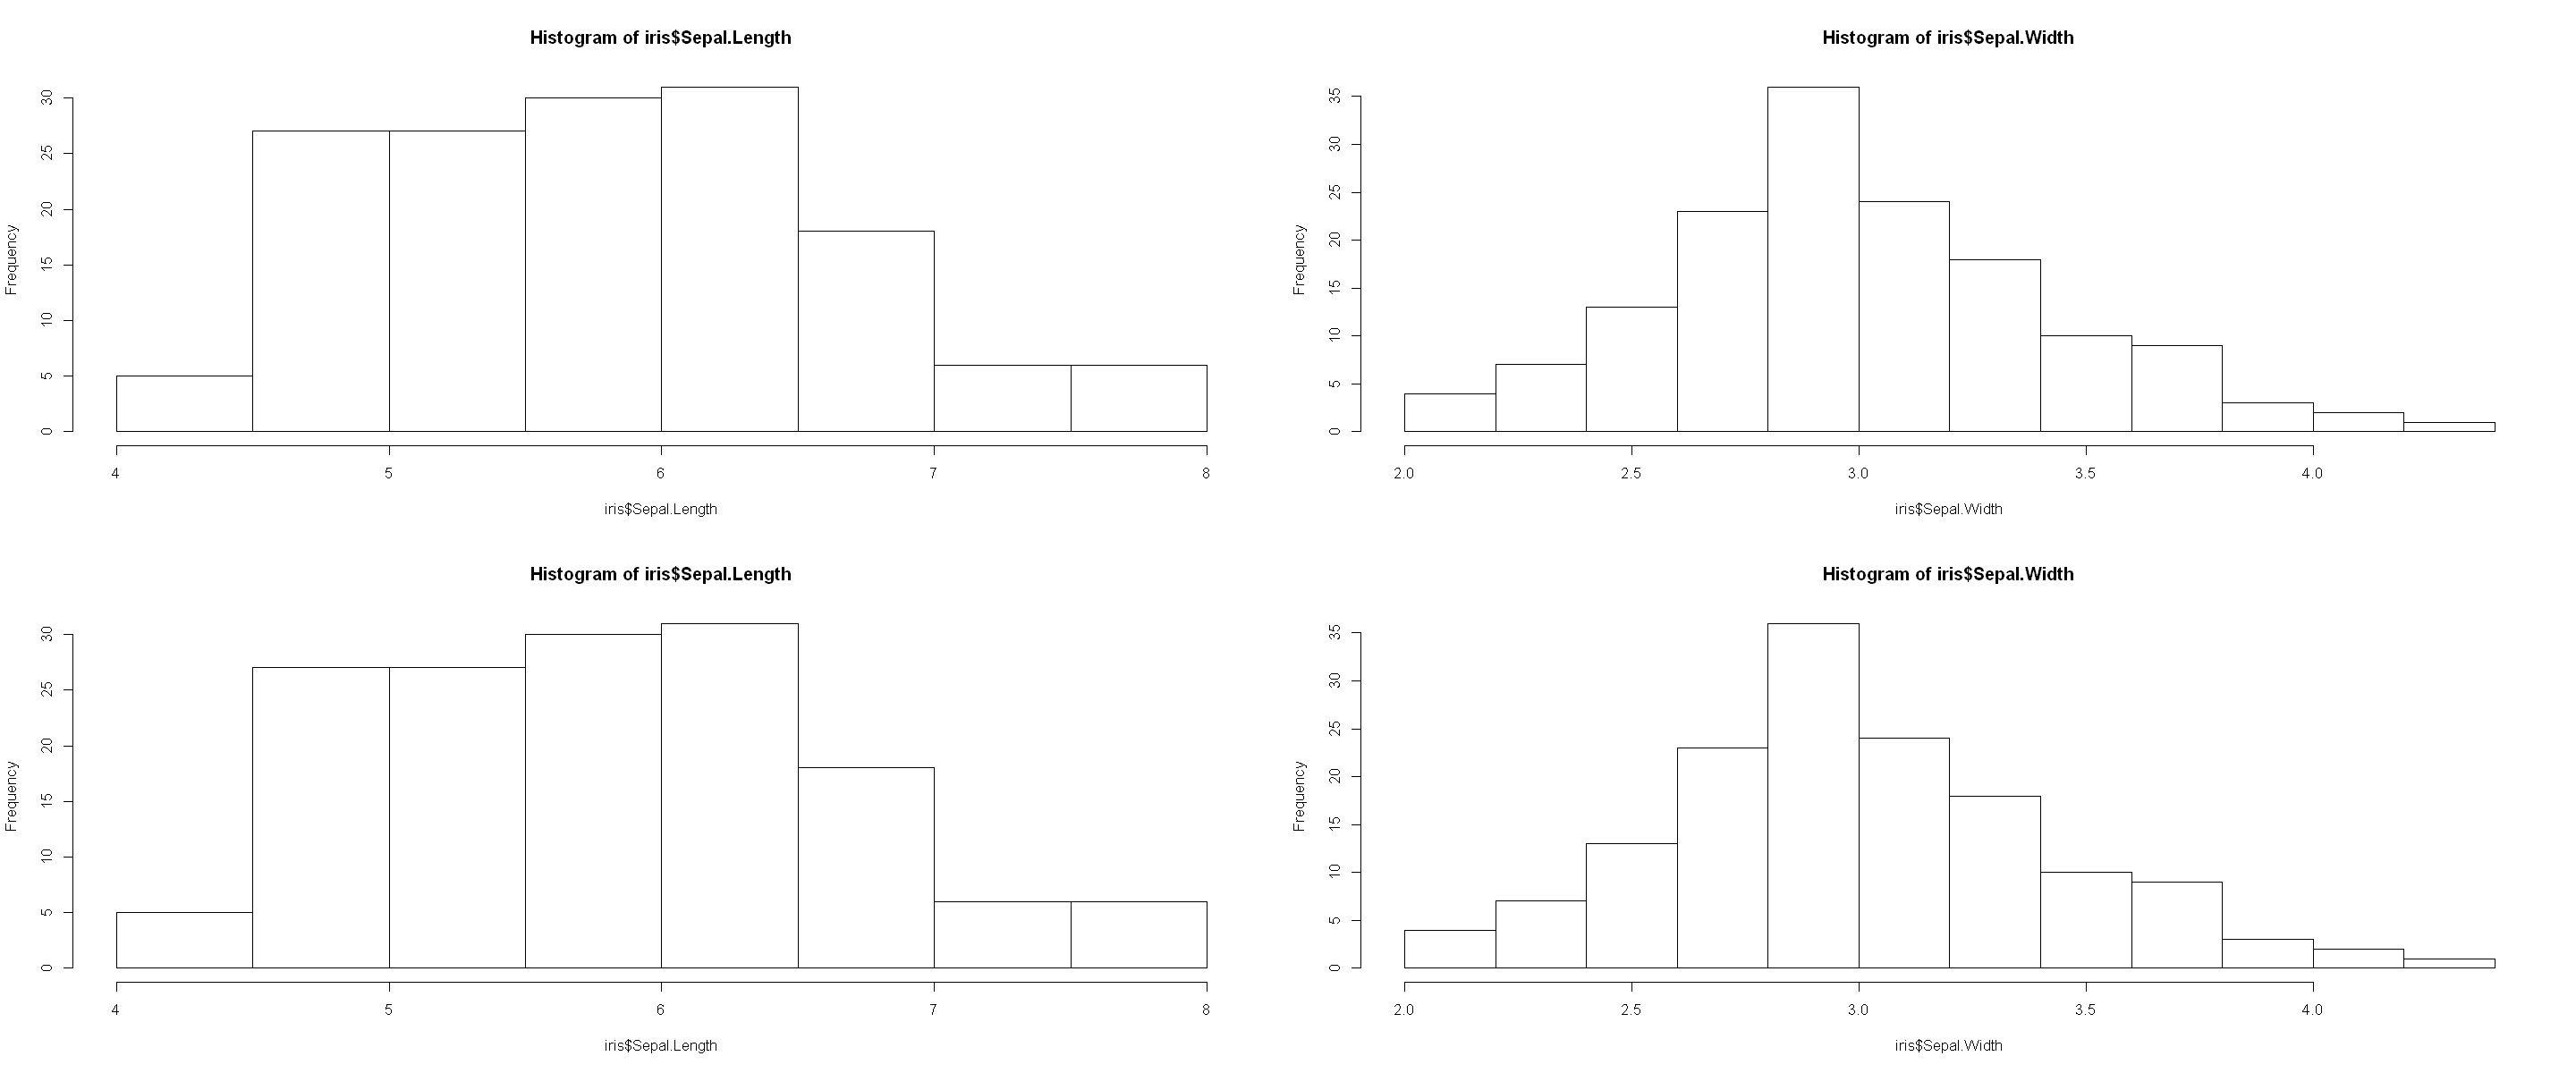

In [32]:
plot_size(24, 10)
par(mfrow=c(2,2))
hist(iris$Sepal.Length)
hist(iris$Sepal.Width)
hist(iris$Sepal.Length)
hist(iris$Sepal.Width)
plot_size(12, 5)

In [33]:
loadlibrary("reshape")
data <- melt(iris)
head(data)

Using Species as id variables



,Species,variable,value
,<fct>,<fct>,<dbl>
1,setosa,Sepal.Length,5.1
2,setosa,Sepal.Length,4.9
3,setosa,Sepal.Length,4.7
4,setosa,Sepal.Length,4.6
5,setosa,Sepal.Length,5.0
6,setosa,Sepal.Length,5.4


In [34]:
loadlibrary("RColorBrewer")
col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

### Box-plot analysis

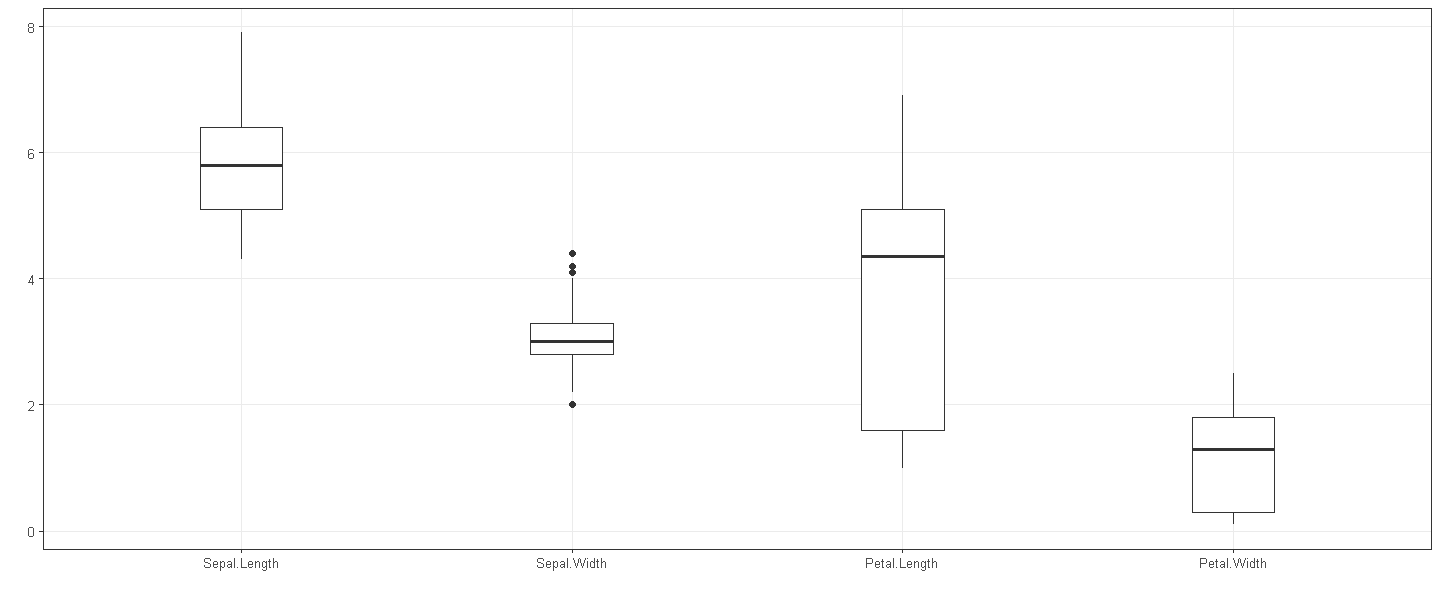

In [35]:
grfA <- plot.boxplot(data, colors="white")
plot(grfA)

### Density distribution

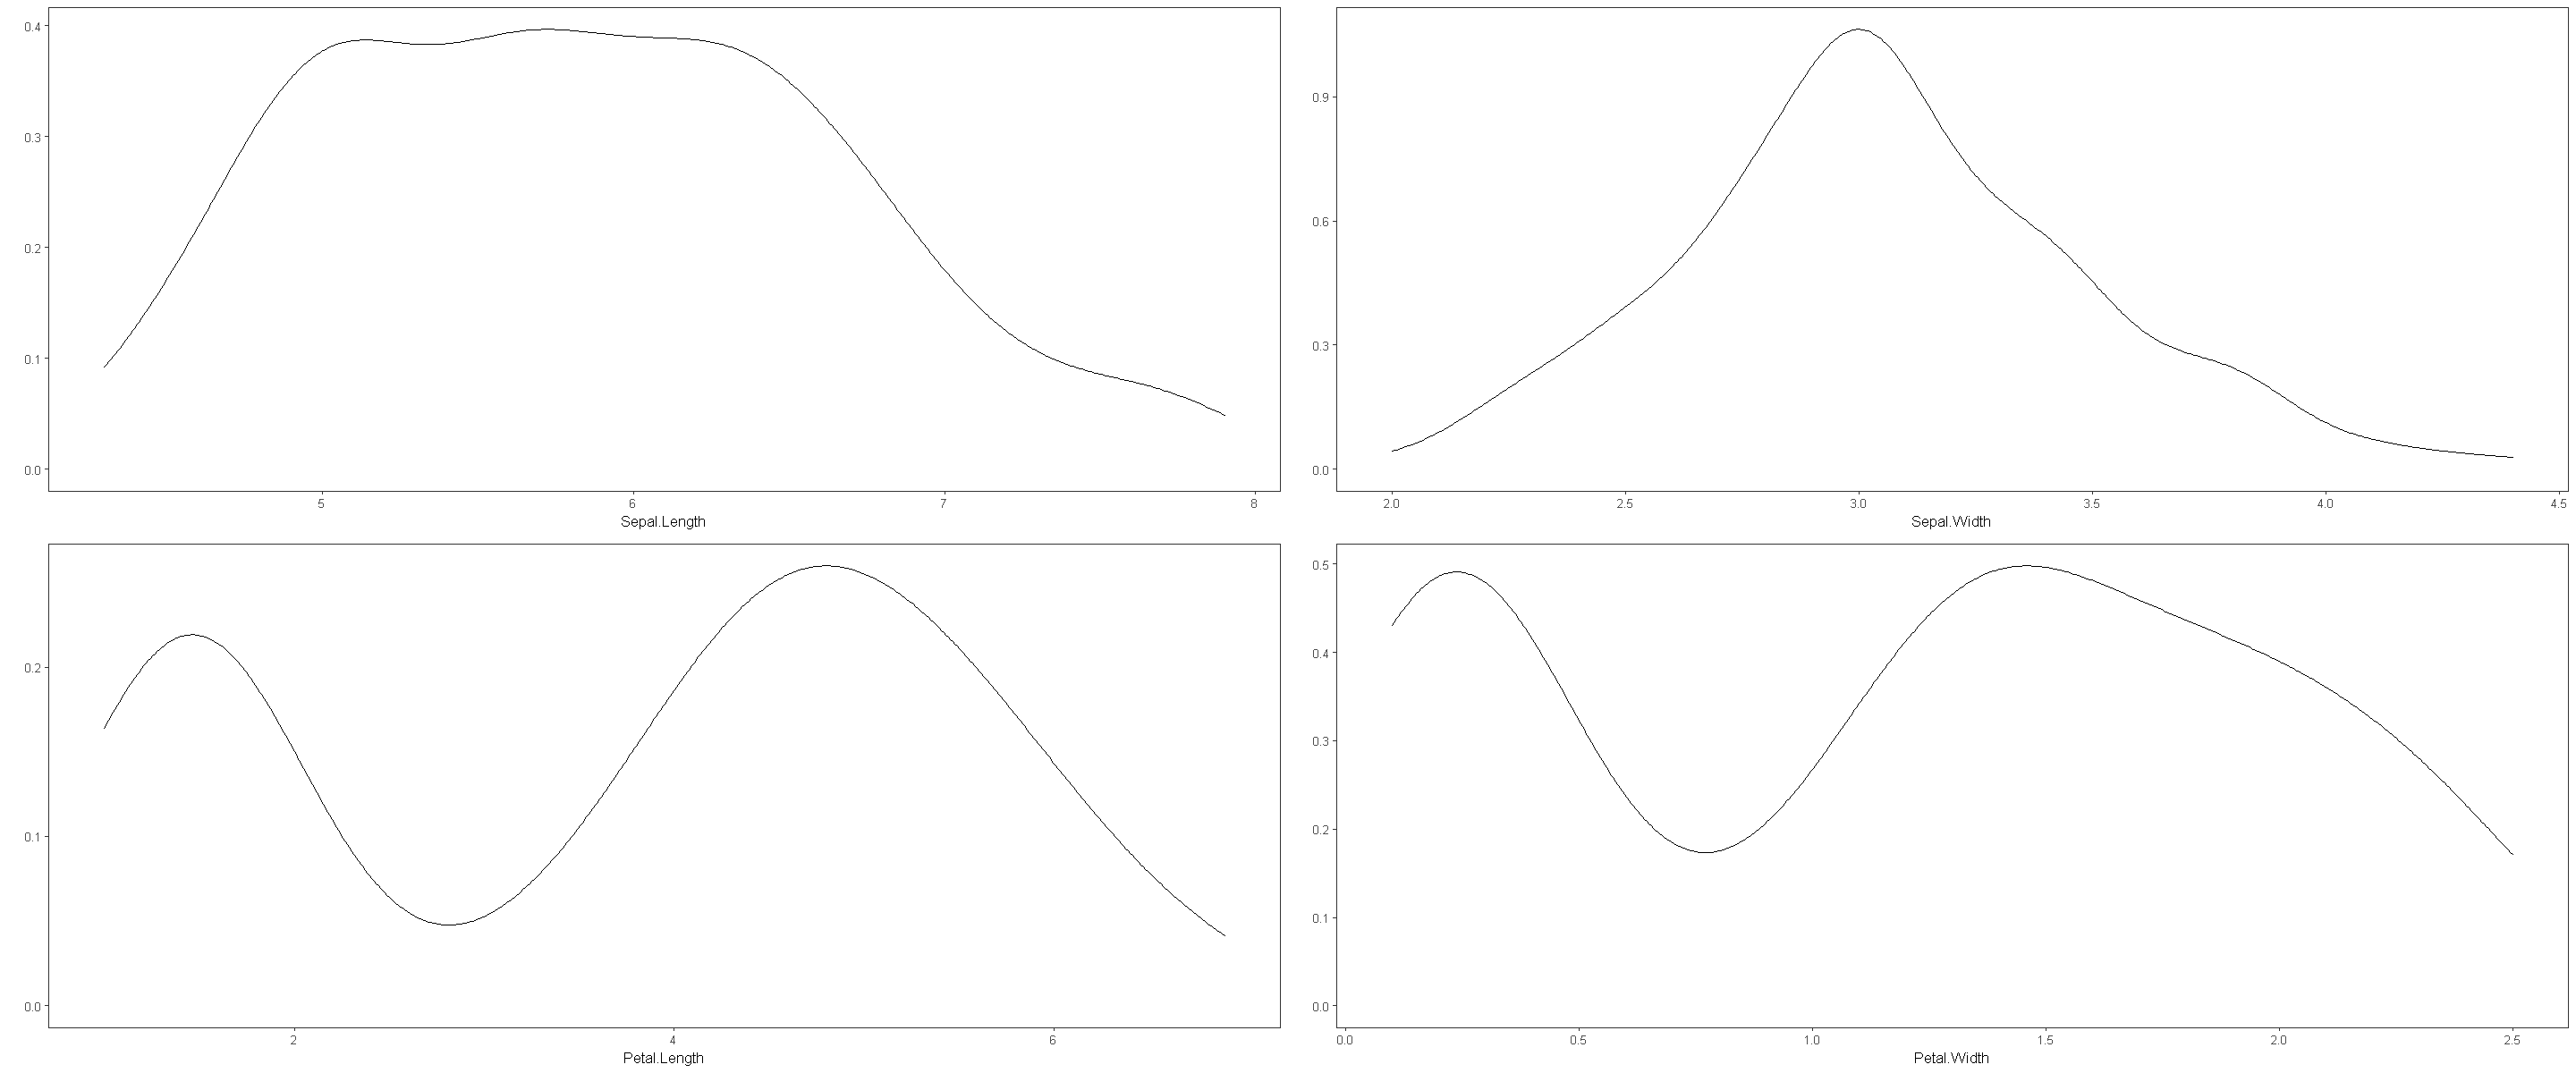

In [36]:
loadlibrary("gridExtra")
loadlibrary("dplyr")
grfA <- plot.density(iris %>% dplyr::select(variable=Sepal.Length, value=Sepal.Length), label_x = "Sepal.Length", color="white")
grfB <- plot.density(iris %>% dplyr::select(variable=Sepal.Width, value=Sepal.Width), label_x = "Sepal.Width", color="white")
grfC <- plot.density(iris %>% dplyr::select(variable=Petal.Length, value=Petal.Length), label_x = "Petal.Length", color="white")
grfD <- plot.density(iris %>% dplyr::select(variable=Petal.Width, value=Petal.Width), label_x = "Petal.Width", color="white")
plot_size(24, 10)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
plot_size(12, 5)

### Density distribution colored by the classifier

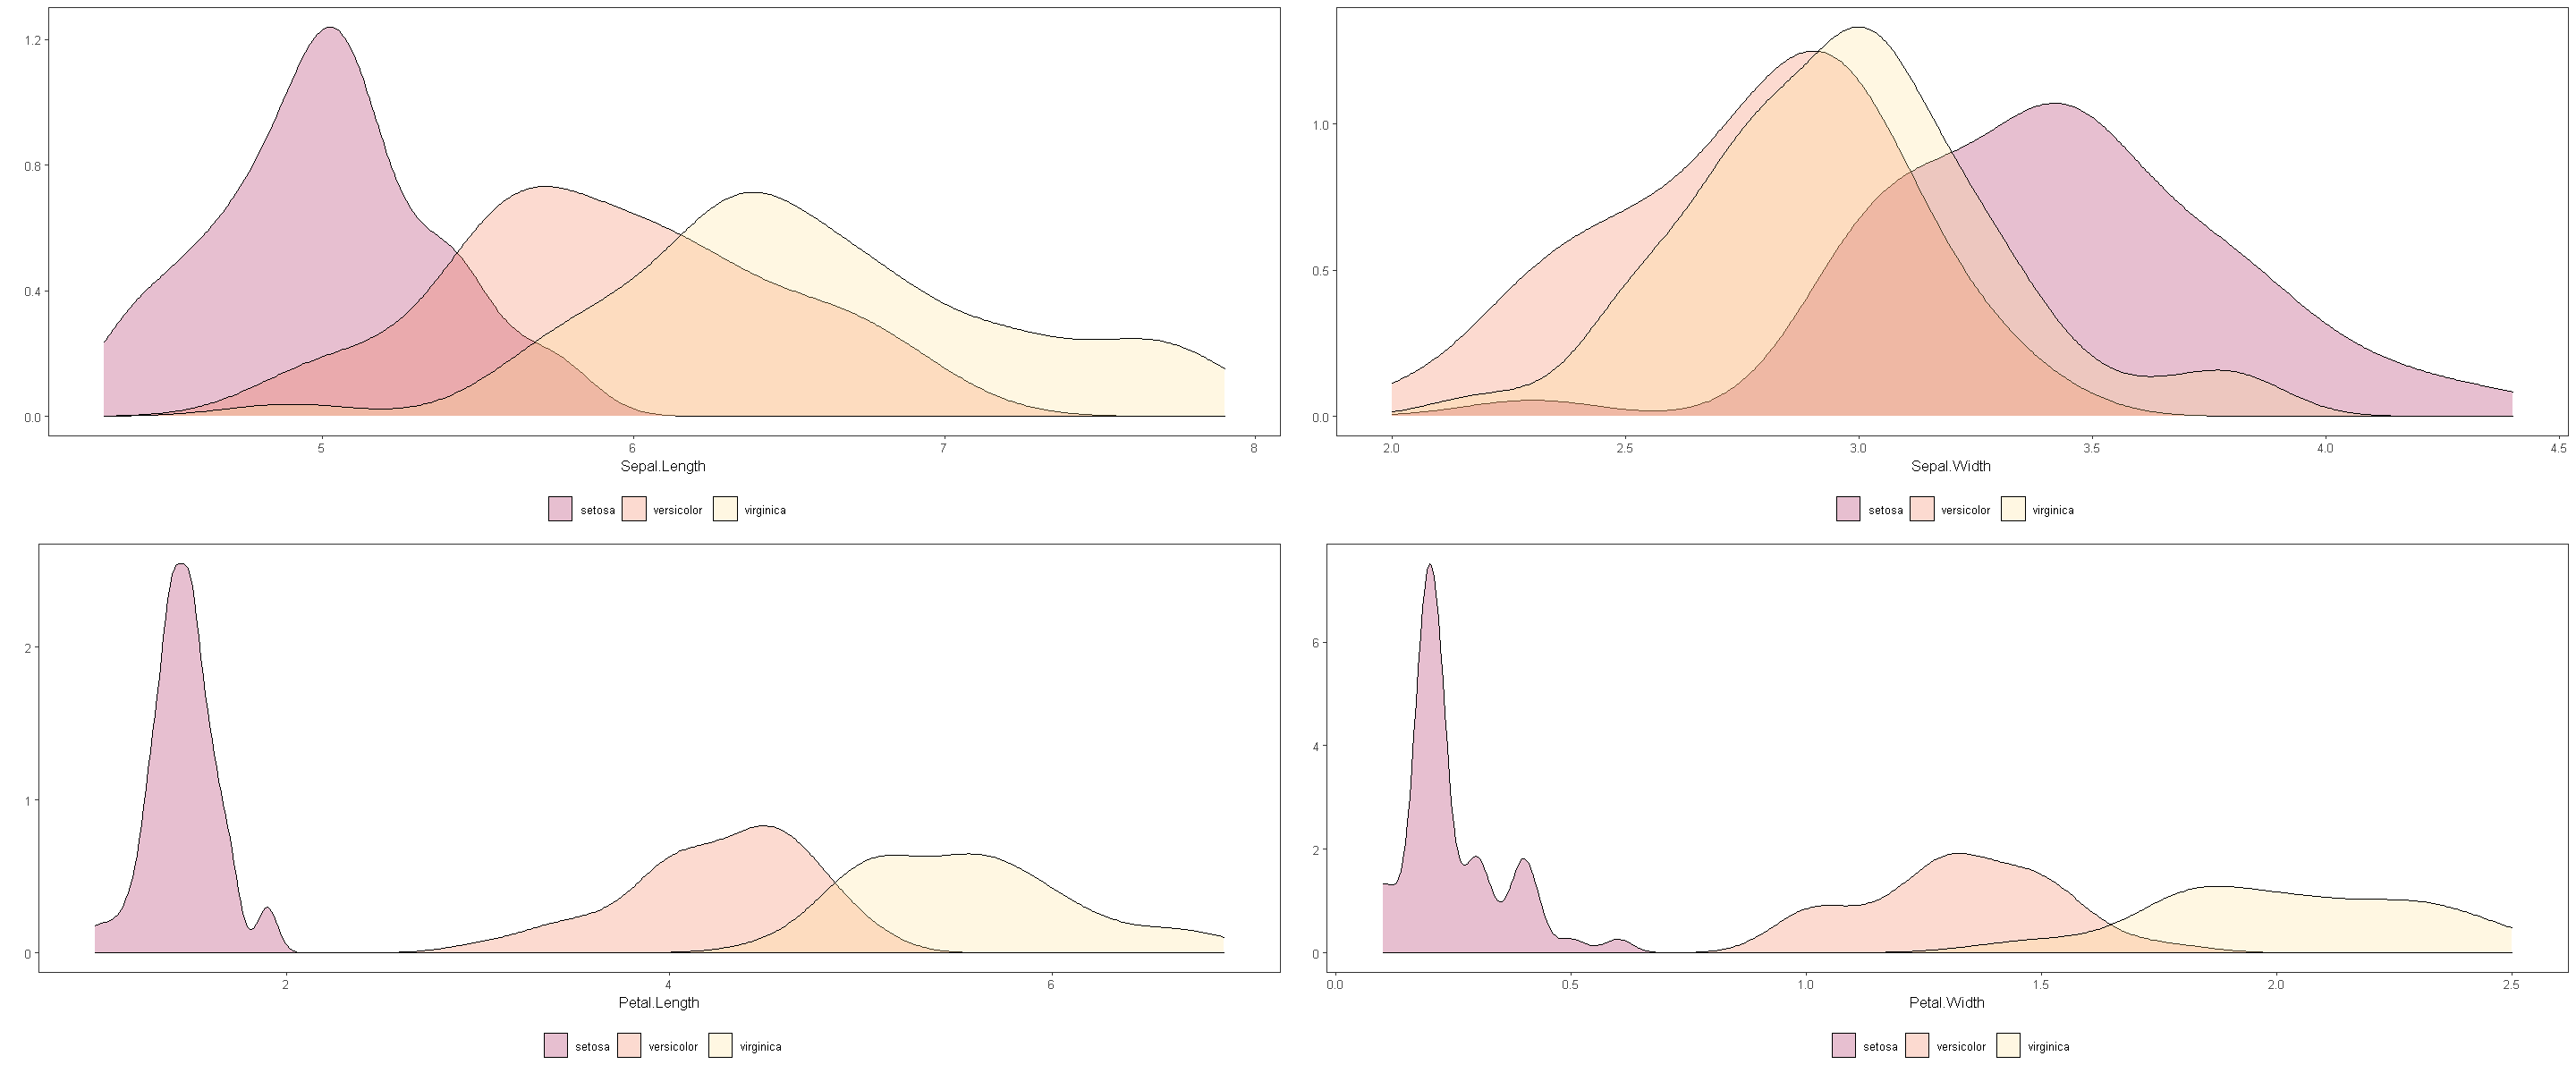

In [37]:
grfA <- plot.density(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.density(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.density(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.density(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])
plot_size(24, 10)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
plot_size(12, 5)

### Box-plot analysis grouped by the classifier

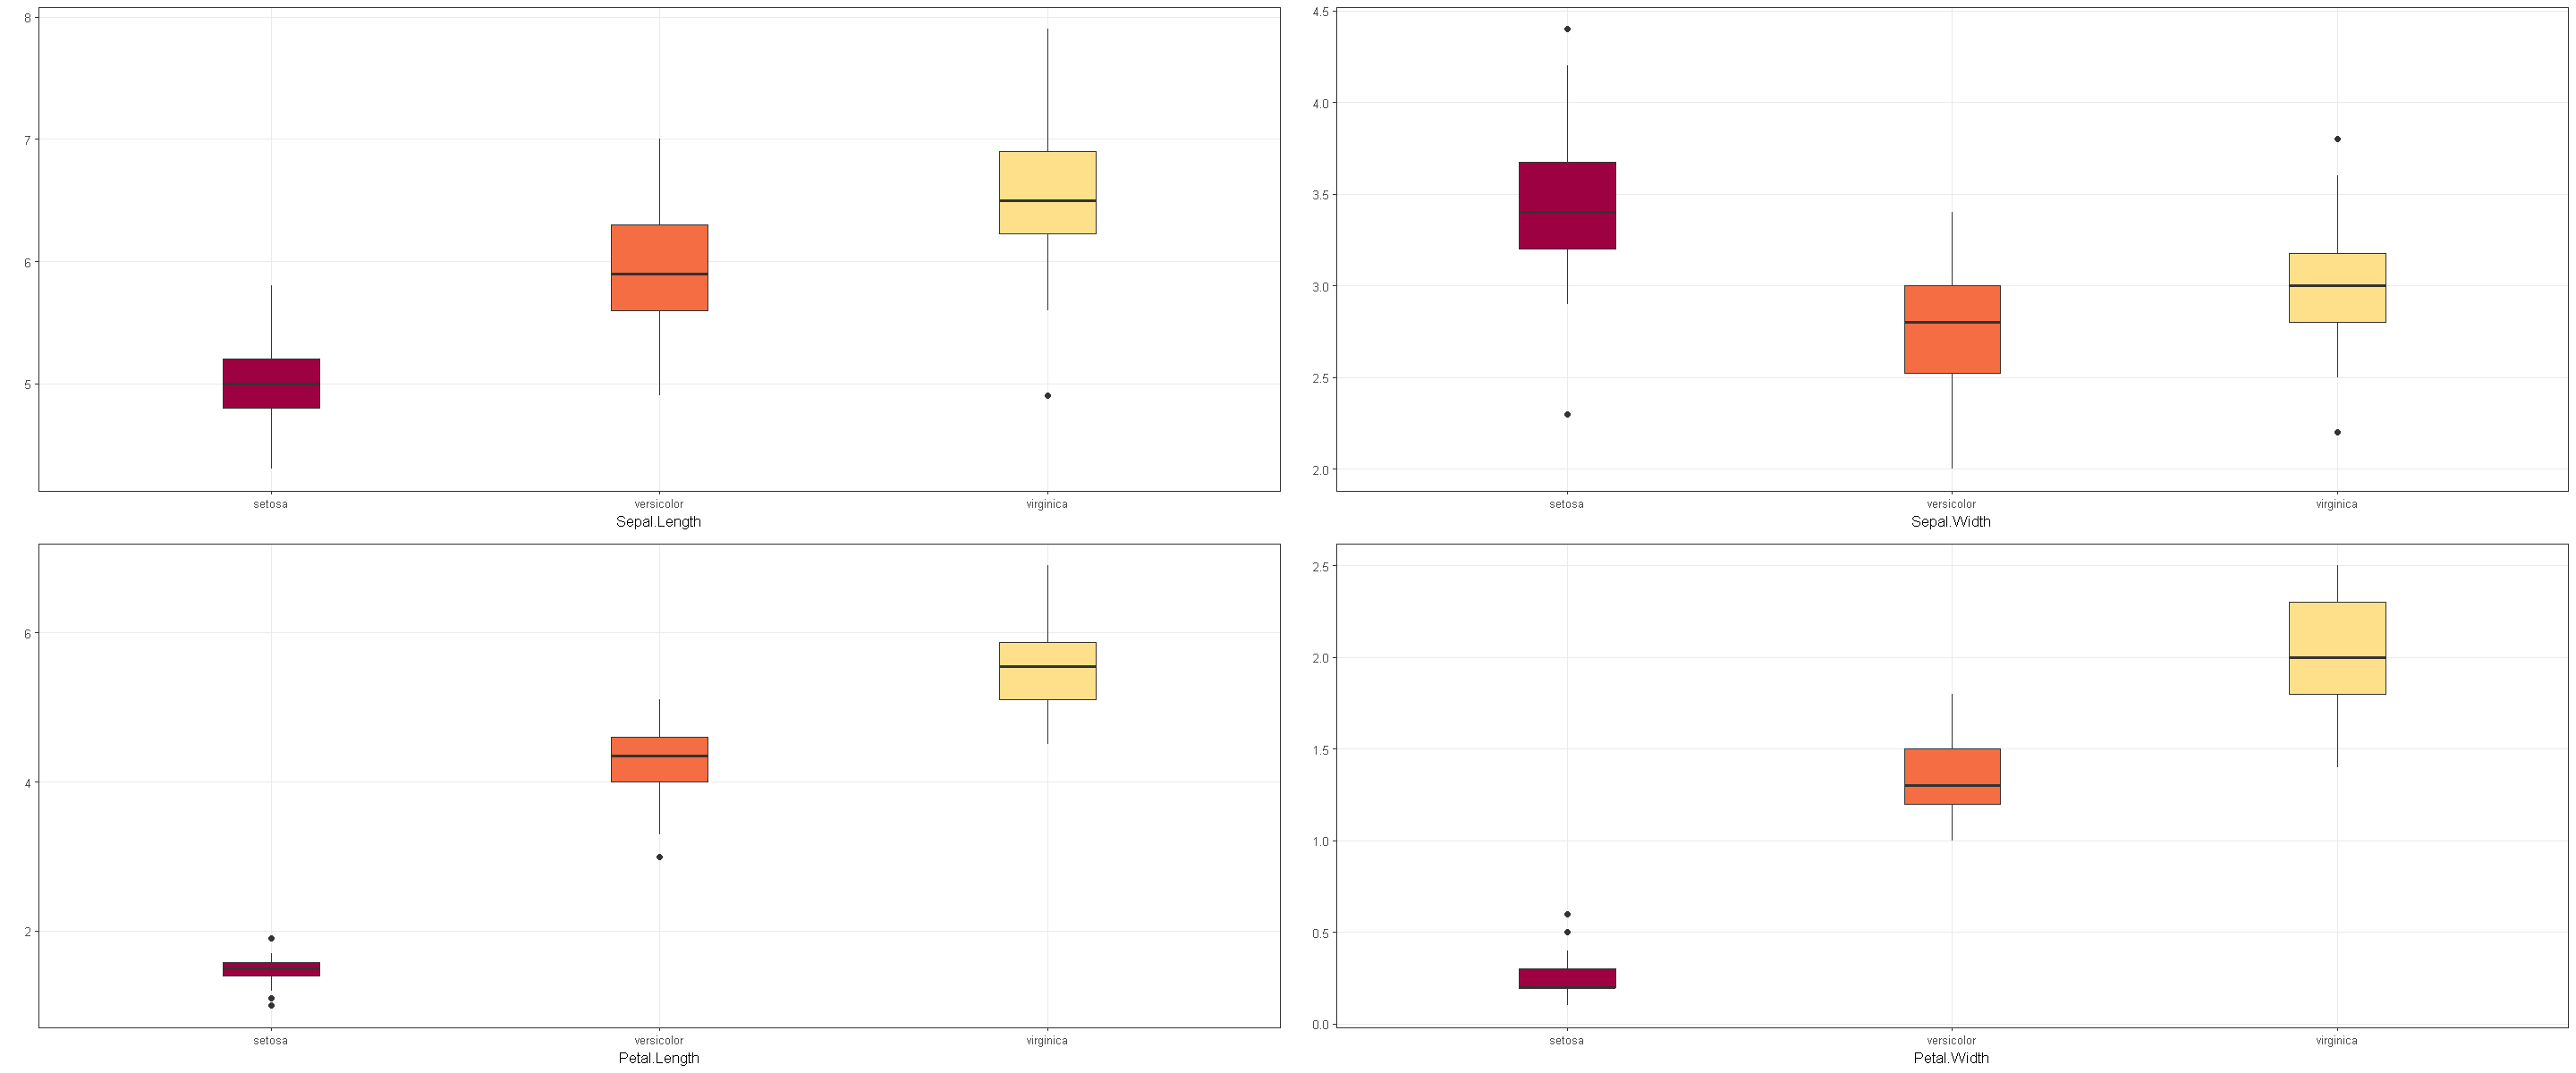

In [38]:
grfA <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])
plot_size(24, 10)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)


## Part 3

### Scatter plot

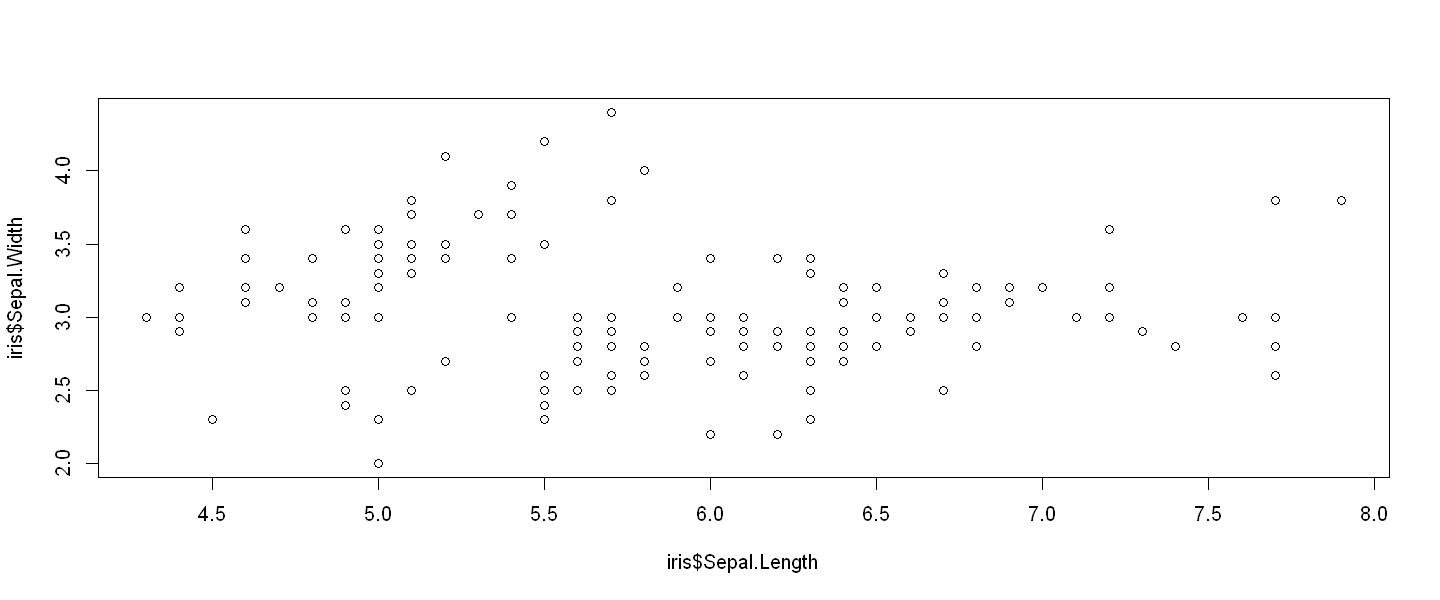

In [39]:
plot_size(12, 5)
plot(iris$Sepal.Length,iris$Sepal.Width)

### Correlation matrix

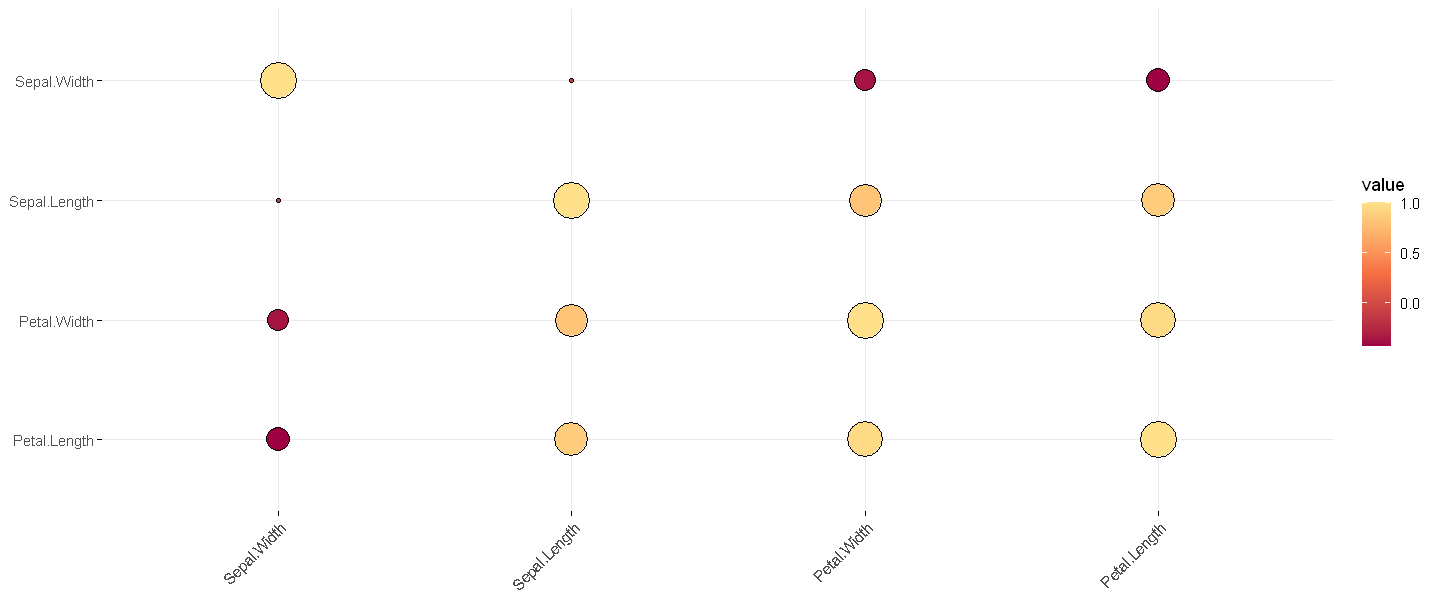

In [40]:
grf <- exp_correlation(iris[,1:4], color = mycolors[1:3]) 
plot(grf)

## Matrix dispersion

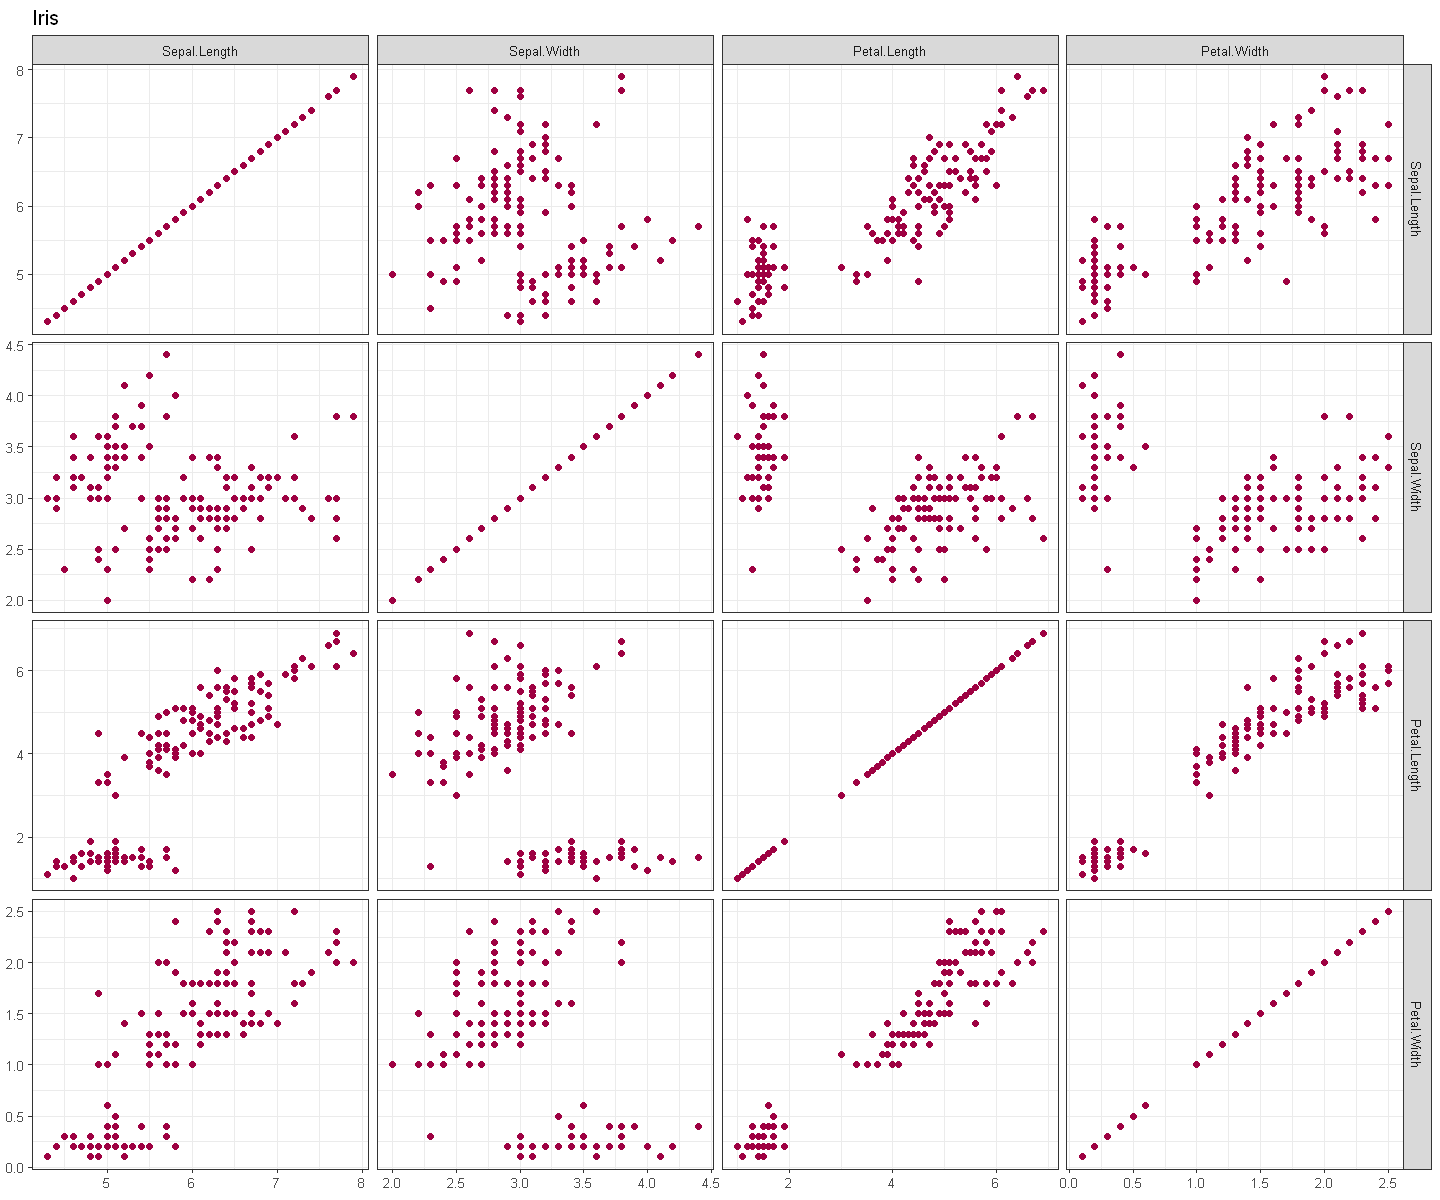

In [41]:
loadlibrary("WVPlots")
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])
plot_size(12, 10)
grf


## Matrix dispersion by the classifier

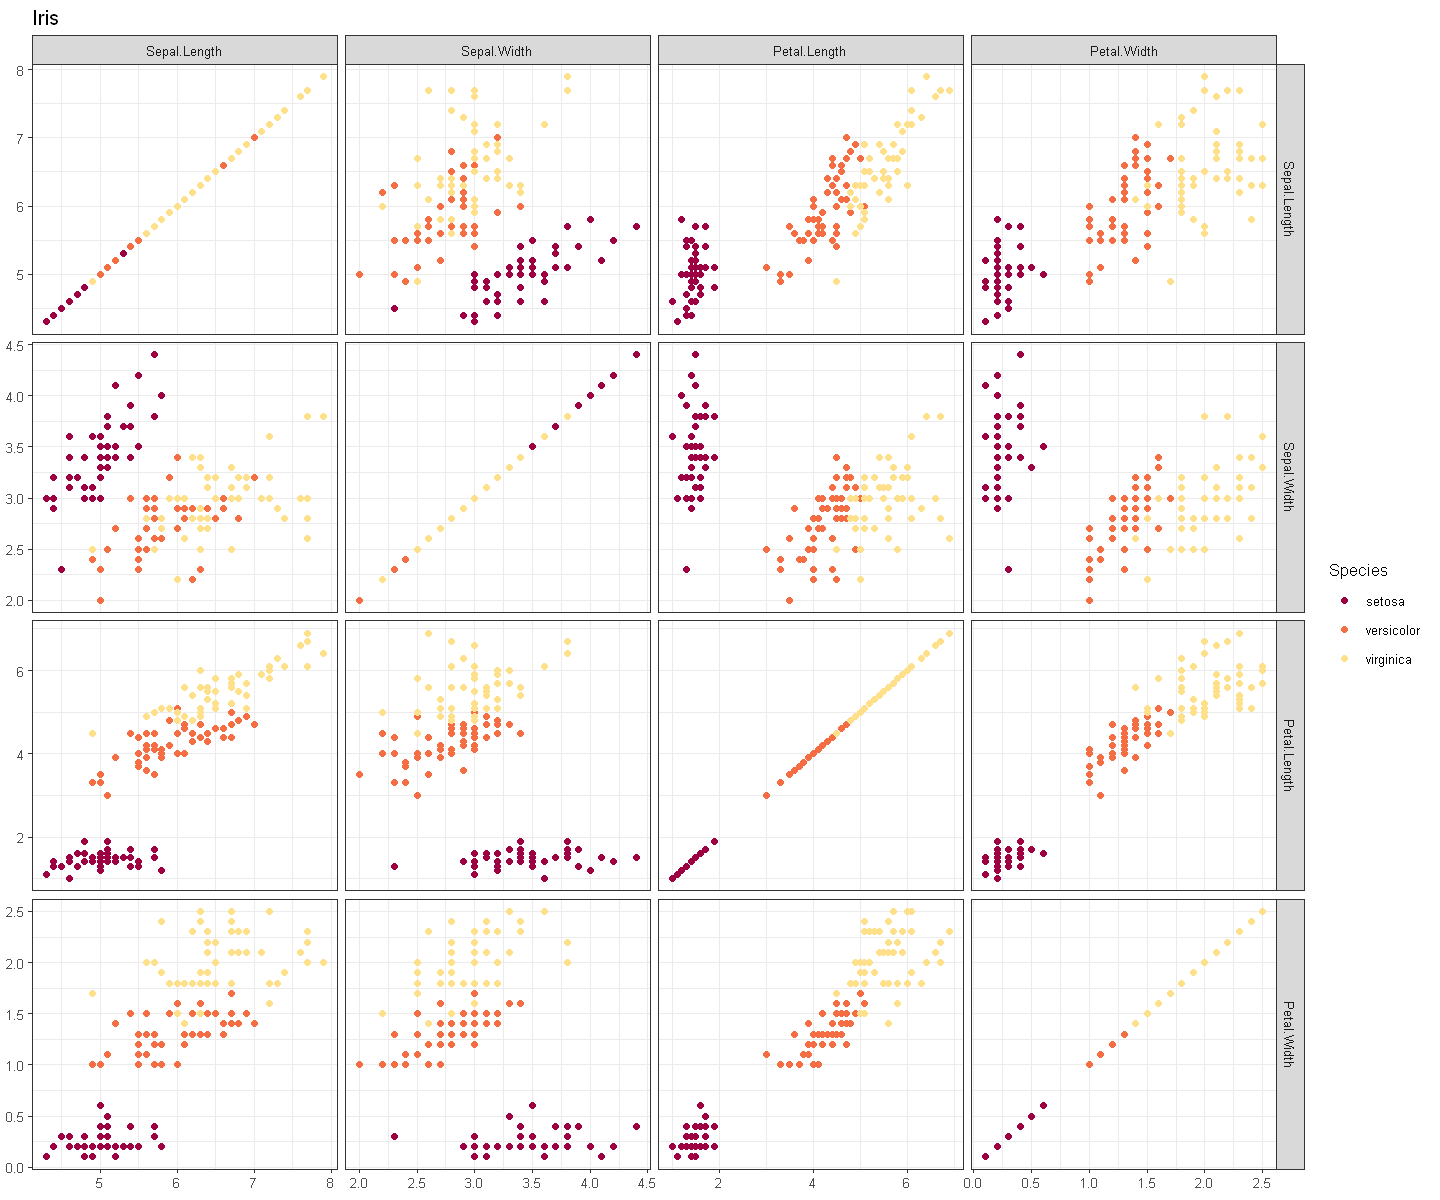

In [42]:
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], clabel='Species', title="Iris", colors=mycolors[1:3])
grf


## Advanced matrix dispersion

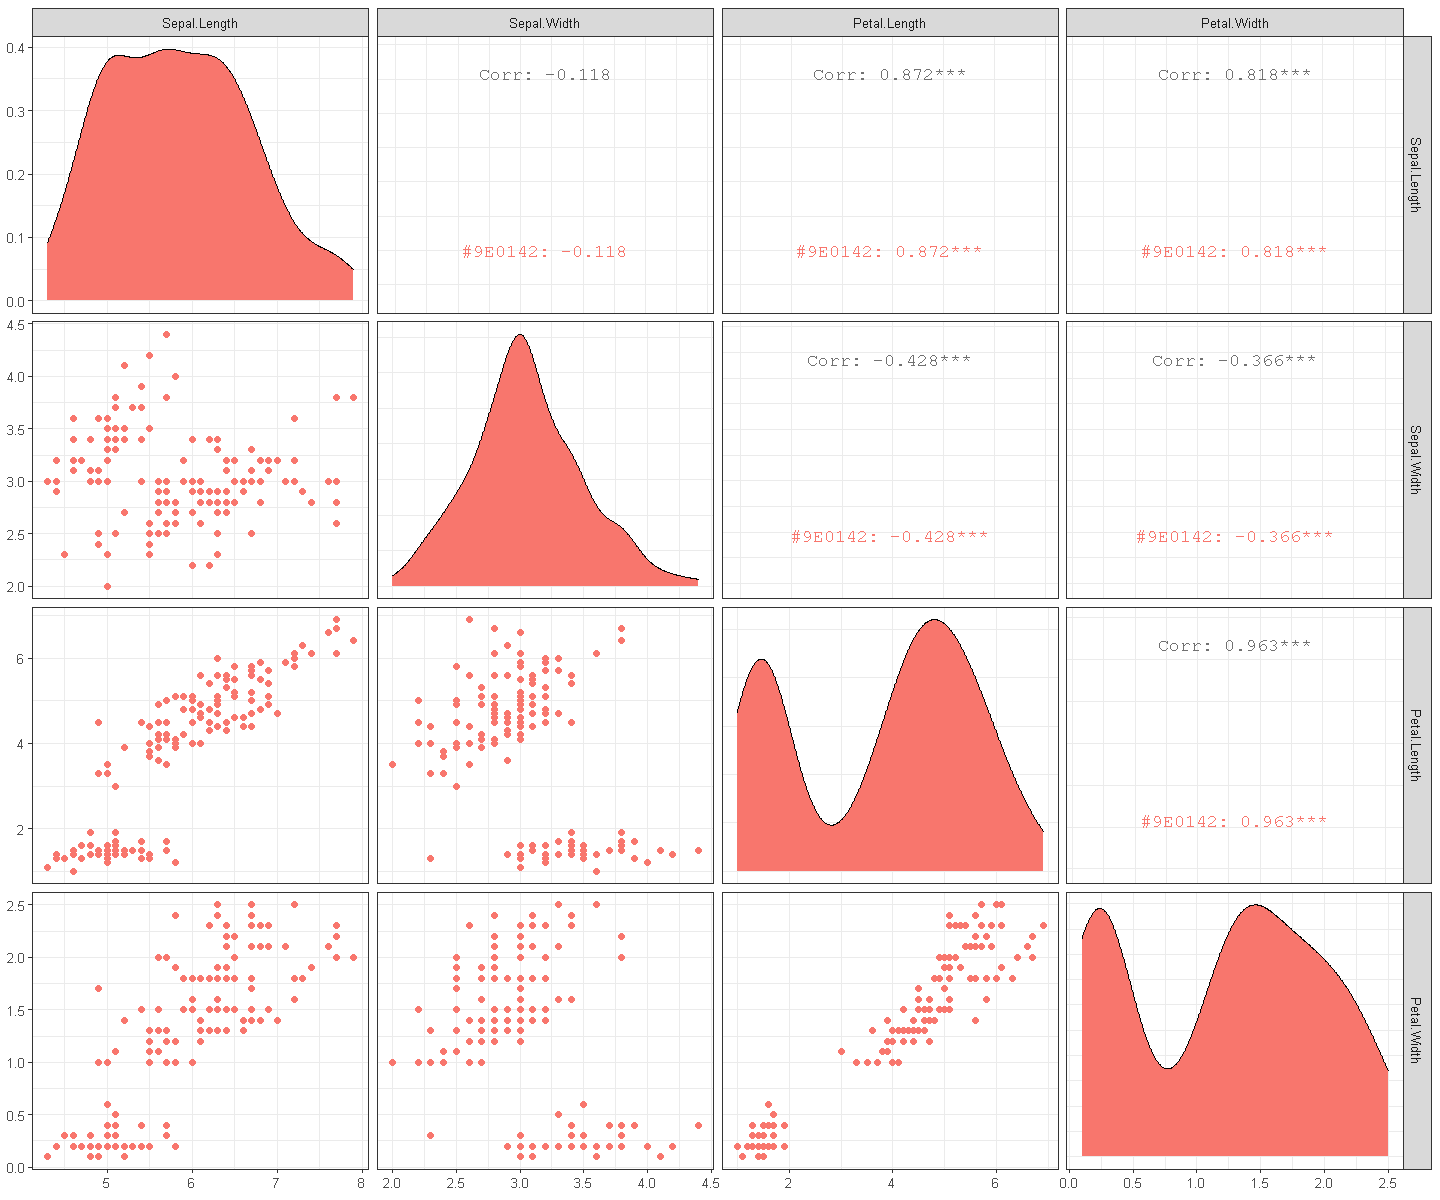

In [43]:
loadlibrary("GGally")
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])
grf


## Advanced matrix dispersion with the classifier

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



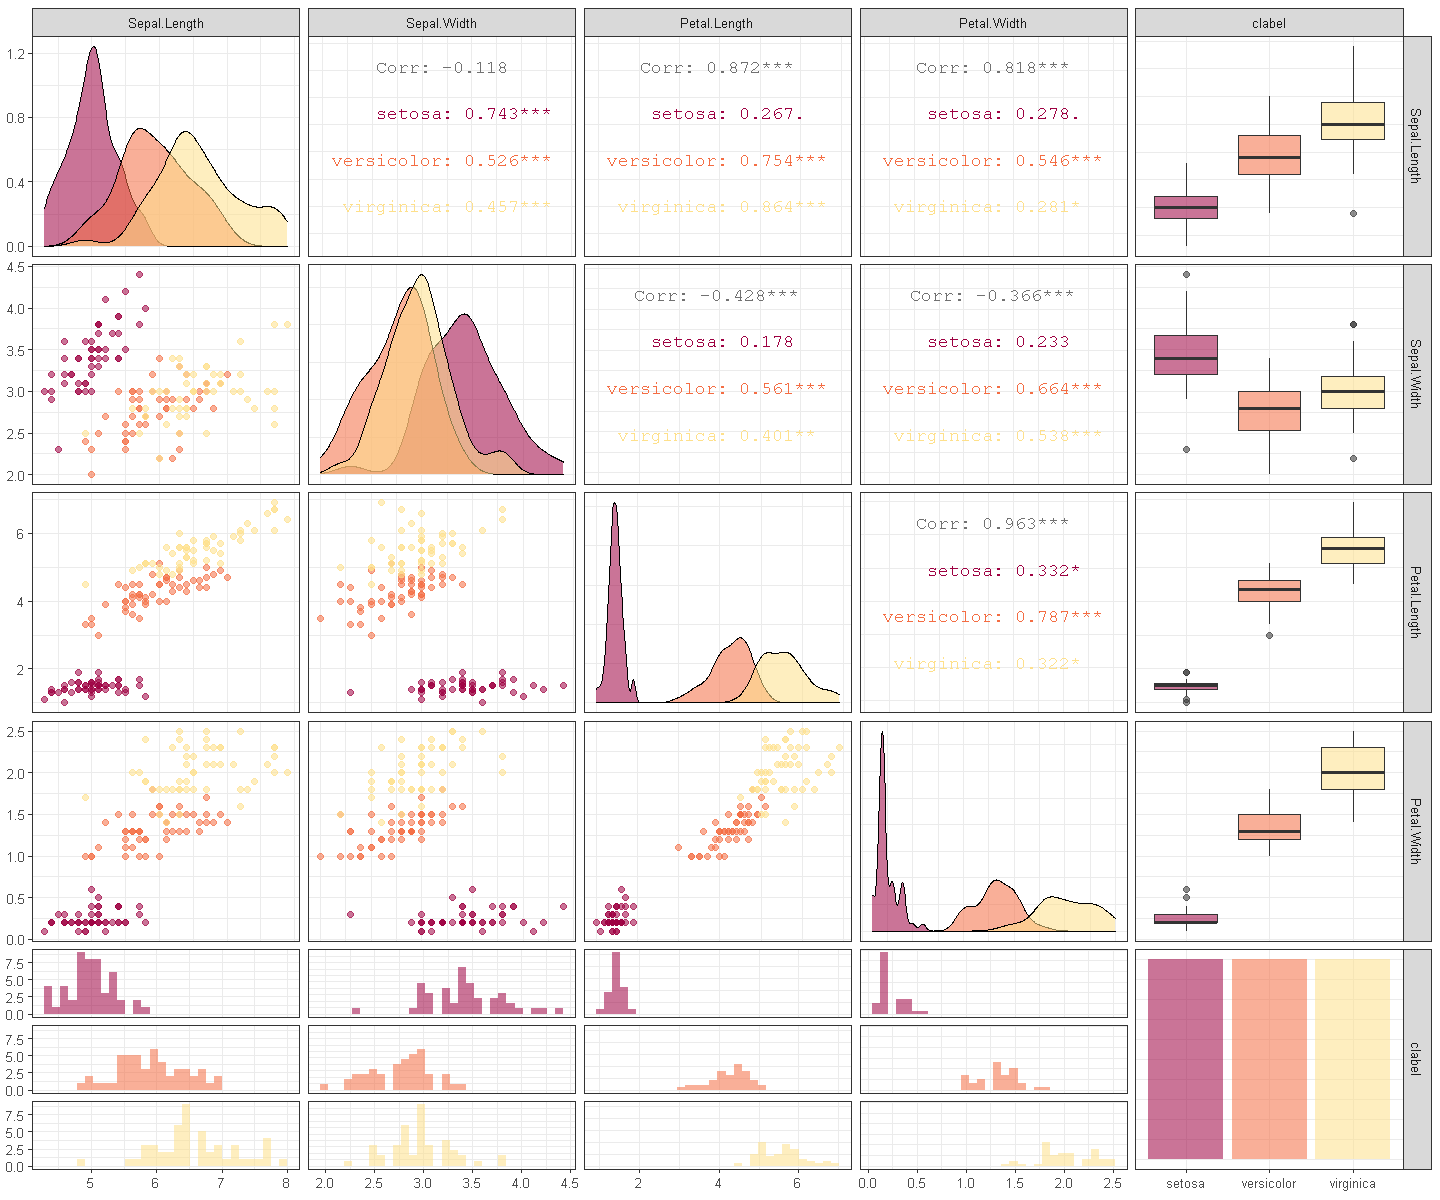

In [44]:
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", clabel='Species', colors=mycolors[1:3])
grf


## Parallel coordinates

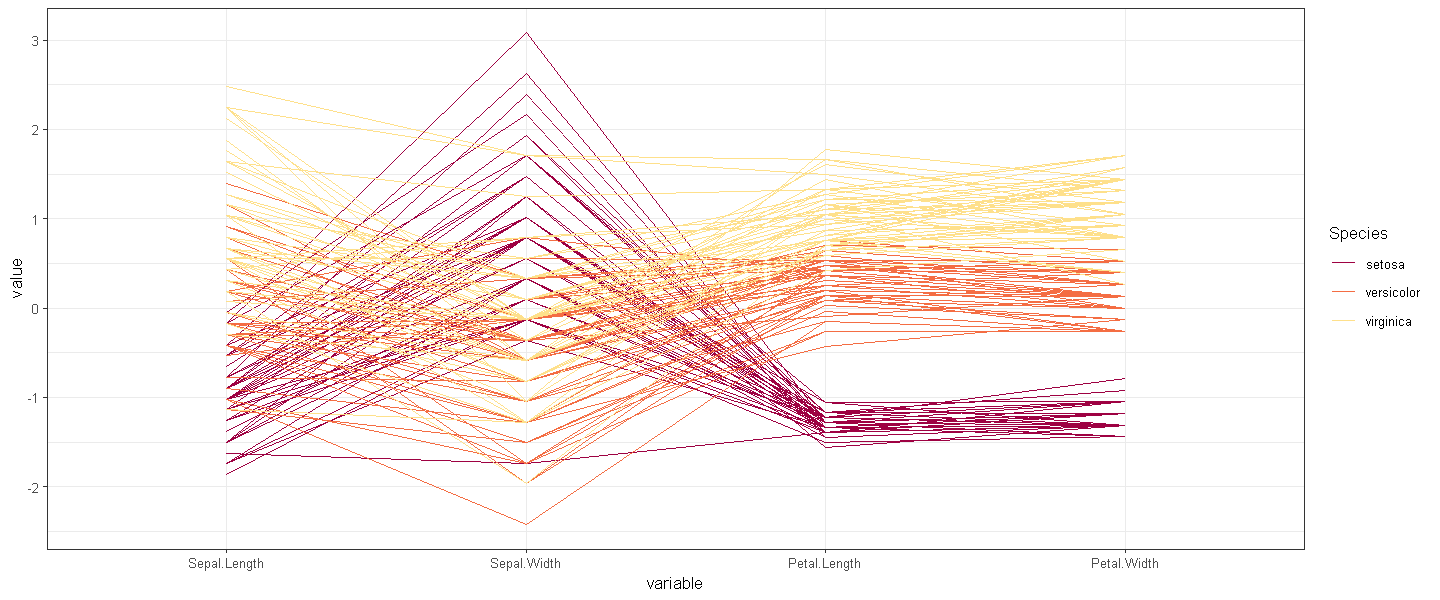

In [45]:
grf <- ggparcoord(data = iris, columns = c(1:4), group=5) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot_size(12, 5)
plot(grf)


## Images

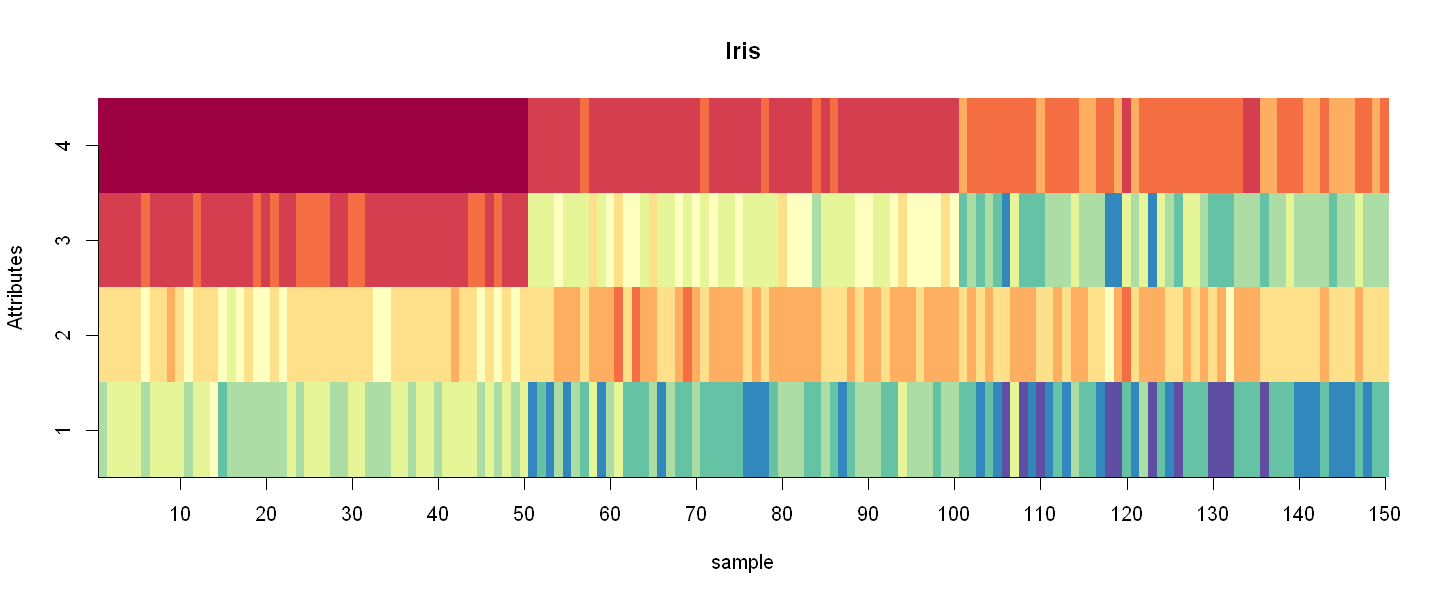

In [46]:
mat <- as.matrix(iris[,1:4])
x <- (1:nrow(mat))
y <- (1:ncol(mat))
image(x, y, mat, col = col.set, axes = FALSE,  main = "Iris", xlab="sample", ylab="Attributes")
axis(2, at = seq(0, ncol(mat), by = 1))
axis(1, at = seq(0, nrow(mat), by = 10))

## Chernoff faces

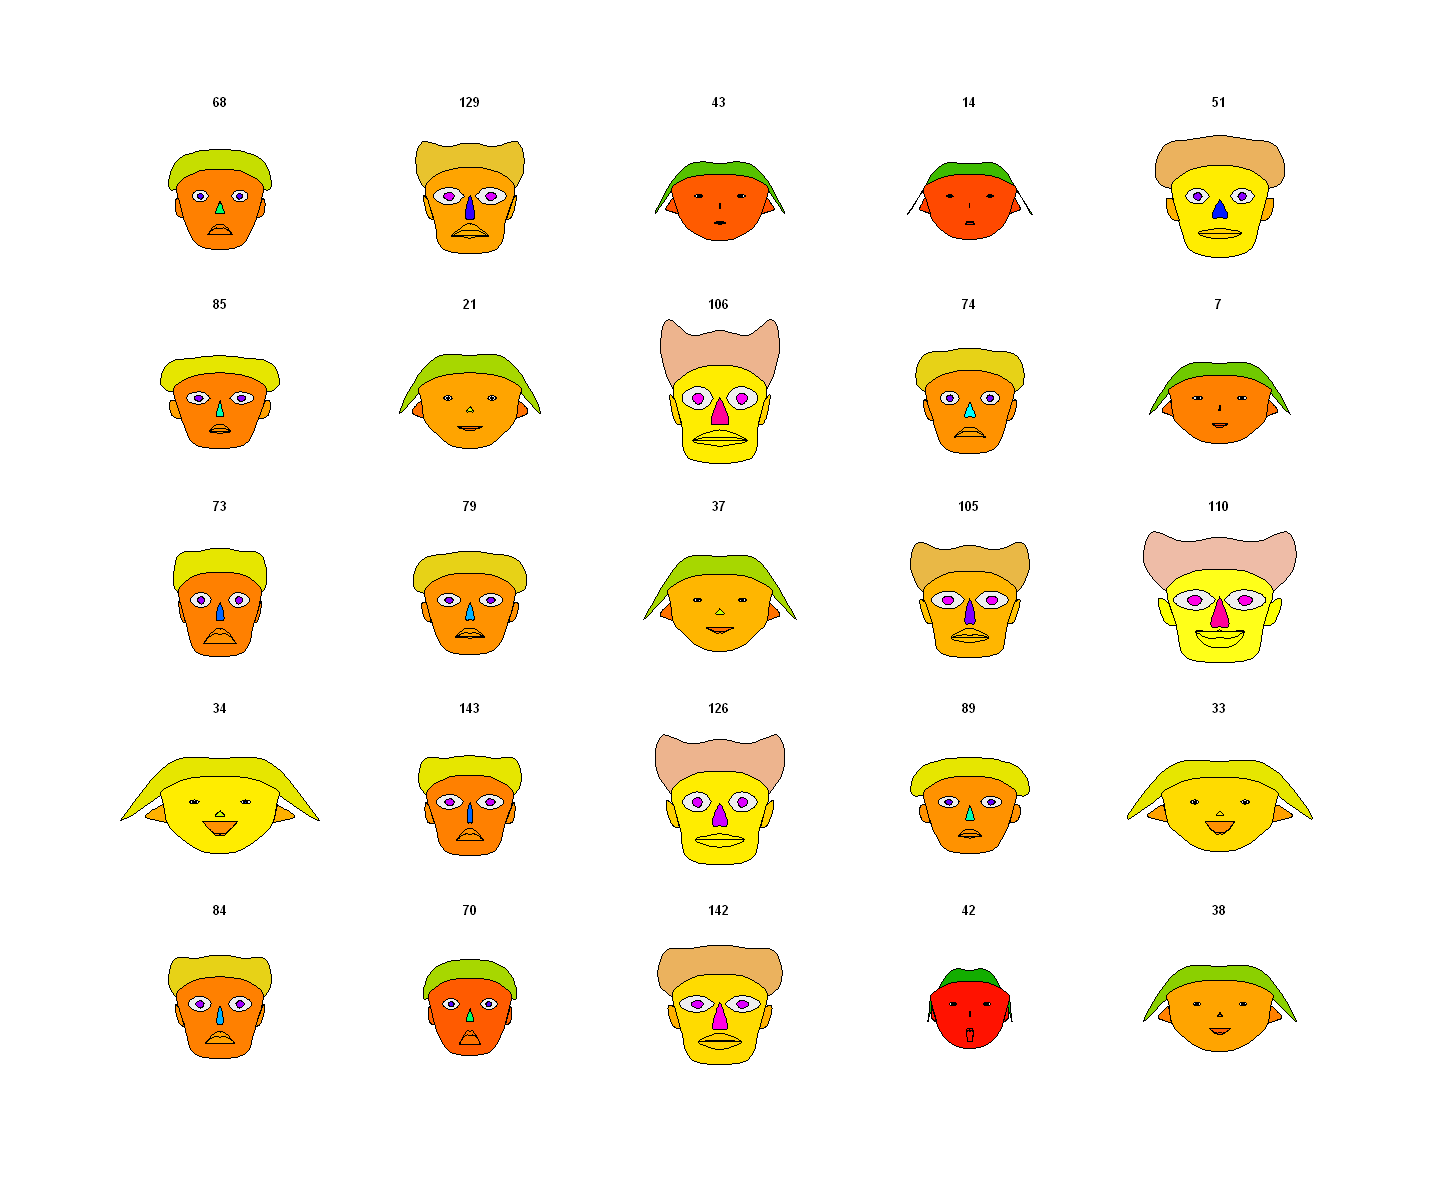

In [47]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(rownames(isample))
isample$Species <- NULL


loadlibrary("aplpack")
plot_size(12, 10)
faces(isample, labels = labels, print.info=F, cex=1)

## Chernoff faces with the classifier

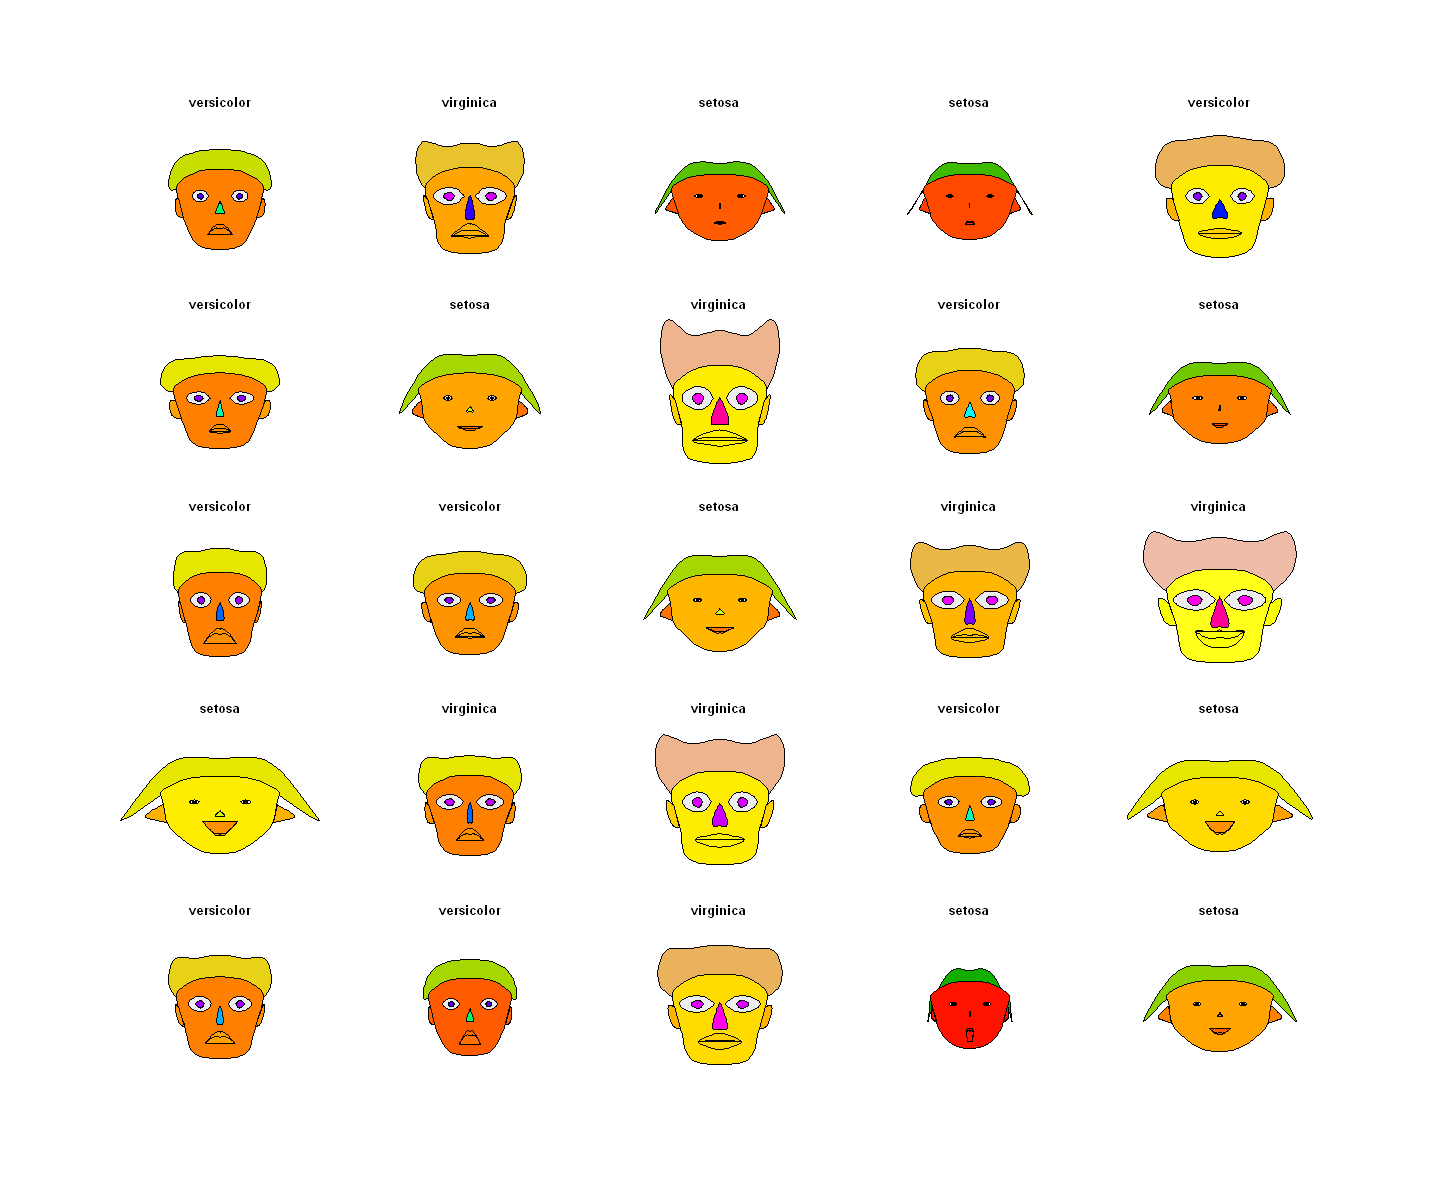

In [48]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL


faces(isample, labels = labels, print.info=F, cex=1)
